### **Upload data file to colab and prepare some function**

In [1]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_stuffs(model, y_test, y_pred):
  # === Confusion matrix ===
  cm = confusion_matrix(y_test, y_pred);
  tn, fp, fn, tp = cm.ravel()

  # === Metrics ===
  accuracy    = (tp + tn) / (tp + tn + fp + fn)
  sensitivity = tp / (tp + fn) if (tp + fn) != 0 else 0    # Recall
  specificity = tn / (tn + fp) if (tn + fp) != 0 else 0
  precision   = tp / (tp + fp) if (tp + fp) != 0 else 0
  f1_score    = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) != 0 else 0
  npv         = tn / (tn + fn) if (tn + fn) != 0 else 0    # Negative Predictive Value
  fpr         = fp / (fp + tn) if (fp + tn) != 0 else 0
  fdr         = fp / (tp + fp) if (tp + fp) != 0 else 0
  fnr         = fn / (fn + tp) if (fn + tp) != 0 else 0

  # === Display ===
  print(f"TP: {tp}, TN: {tn}, FP: {fp}, FN: {fn}\n")
  print(f"Accuracy     = {accuracy:.4f}")
  print(f"Sensitivity  = {sensitivity:.4f}")
  print(f"Specificity  = {specificity:.4f}")
  print(f"Precision    = {precision:.4f}")
  print(f"F1 Score     = {f1_score:.4f}")
  print(f"NPV          = {npv:.4f}")
  print(f"FPR          = {fpr:.4f}")
  print(f"FDR          = {fdr:.4f}")
  print(f"FNR          = {fnr:.4f}")

  # === Draw Confusion Matrix ===
  plt.figure(figsize=(6, 5))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()


# Built in colab with local data upload

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving output.xlsx to output.xlsx
User uploaded file "output.xlsx" with length 303682 bytes


### **Normal LogisticRegression**

TP: 410, TN: 288, FP: 38, FN: 26

Accuracy     = 0.9160
Sensitivity  = 0.9404
Specificity  = 0.8834
Precision    = 0.9152
F1 Score     = 0.9276
NPV          = 0.9172
FPR          = 0.1166
FDR          = 0.0848
FNR          = 0.0596


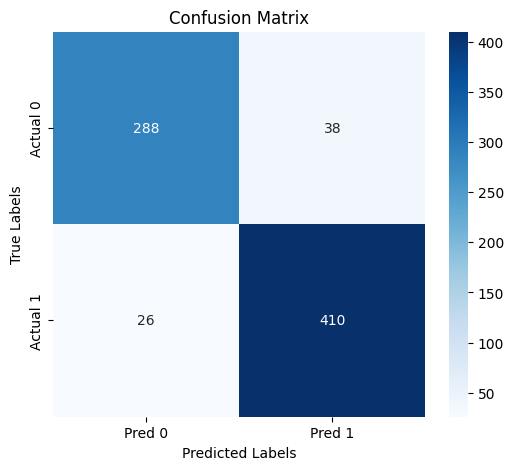

In [16]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# Load dữ liệu từ file CSV (đảm bảo file đã được tải lên hoặc có đường dẫn đúng)
data = pd.read_excel('output.xlsx', sheet_name="Sheet1")
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])  # Cammeo -> 0 (or 1)

# Giả sử cột 'target' là nhãn, còn các cột khác là đặc trưng.
# Nếu tên cột khác, bạn cần điều chỉnh lại.
X = data.drop("Class", axis=1)  # Các đặc trưng
y = data["Class"]               # Nhãn

# Nếu dữ liệu có giá trị thiếu, bạn có thể thực hiện tiền xử lý như sau (tùy chọn)
# X = X.fillna(method='ffill')

# Tách dữ liệu thành 2 phần: tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Chuẩn hóa dữ liệu (thường cần thiết cho Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Tạo mô hình Logistic Regression và huấn luyện
model = LogisticRegression(max_iter=10000)  # max_iter tăng lên nếu cần để hội tụ
model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test_scaled)

# Đánh giá mô hình
calculate_stuffs(model, y_test, y_pred)

### **LogisticRegression With K-Fold**

Total TP: 2046, TN: 1491, FP: 139, FN: 134

Accuracy     = 0.9283
Sensitivity  = 0.9385
Specificity  = 0.9147
Precision    = 0.9364
F1 Score     = 0.9375
NPV          = 0.9175
FPR          = 0.0853
FDR          = 0.0636
FNR          = 0.0615


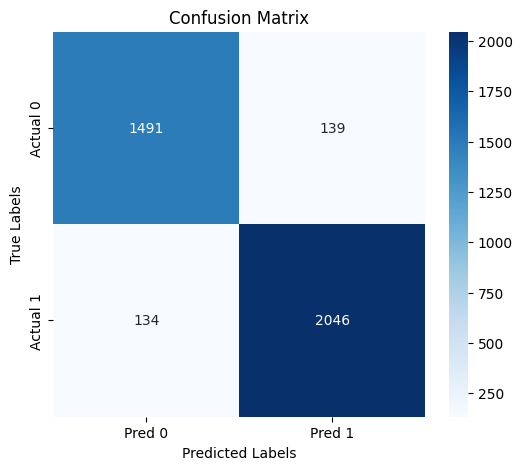

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Excel data
df = pd.read_excel('output.xlsx', sheet_name="Sheet1")
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])  # Cammeo -> 0 (or 1)

# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# === Initialize K-Fold ===
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# === Collect predictions and true labels ===
all_preds = []
all_true = []

# === Initialize confusion matrix totals ===
TP = TN = FP = FN = 0

# === Perform K-Fold ===
for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    all_preds.extend(y_pred)
    all_true.extend(y_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TP += tp
    TN += tn
    FP += fp
    FN += fn

# === Calculate metrics ===
accuracy    = (TP + TN) / (TP + TN + FP + FN)
sensitivity = TP / (TP + FN) if (TP + FN) else 0
specificity = TN / (TN + FP) if (TN + FP) else 0
precision   = TP / (TP + FP) if (TP + FP) else 0
f1_score    = 2 * (precision * sensitivity) / (precision + sensitivity) if (precision + sensitivity) else 0
npv         = TN / (TN + FN) if (TN + FN) else 0
fpr         = FP / (FP + TN) if (FP + TN) else 0
fdr         = FP / (TP + FP) if (TP + FP) else 0
fnr         = FN / (FN + TP) if (FN + TP) else 0

# === Print results ===
print(f"Total TP: {TP}, TN: {TN}, FP: {FP}, FN: {FN}\n")
print(f"Accuracy     = {accuracy:.4f}")
print(f"Sensitivity  = {sensitivity:.4f}")
print(f"Specificity  = {specificity:.4f}")
print(f"Precision    = {precision:.4f}")
print(f"F1 Score     = {f1_score:.4f}")
print(f"NPV          = {npv:.4f}")
print(f"FPR          = {fpr:.4f}")
print(f"FDR          = {fdr:.4f}")
print(f"FNR          = {fnr:.4f}")

# === Draw Confusion Matrix ===
cm = confusion_matrix(all_true, all_preds)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### **LogisticRegression With Hyperparameter Tuning (Grid Search)**

    Area   Perimeter  Major_Axis_Length  Minor_Axis_Length  Eccentricity  \
0  15231  525.578979         229.749878          85.093788      0.928882   
1  14656  494.311005         206.020065          91.730972      0.895405   
2  14634  501.122009         214.106781          87.768288      0.912118   
3  13176  458.342987         193.337387          87.448395      0.891861   
4  14688  507.166992         211.743378          89.312454      0.906691   

   Convex_Area    Extent  Class  
0        15617  0.572896      0  
1        15072  0.615436      0  
2        14954  0.693259      0  
3        13368  0.640669      0  
4        15262  0.646024      0  
Fitting 10 folds for each of 1344 candidates, totalling 13440 fits
Best Parameters: {'classifier__C': 8.3, 'classifier__class_weight': None, 'classifier__dual': False, 'classifier__fit_intercept': True, 'classifier__max_iter': 50, 'classifier__penalty': 'l1', 'classifier__tol': 0.001}
Best Accuracy: 0.9360267471958584
TP: 412, TN: 287, F

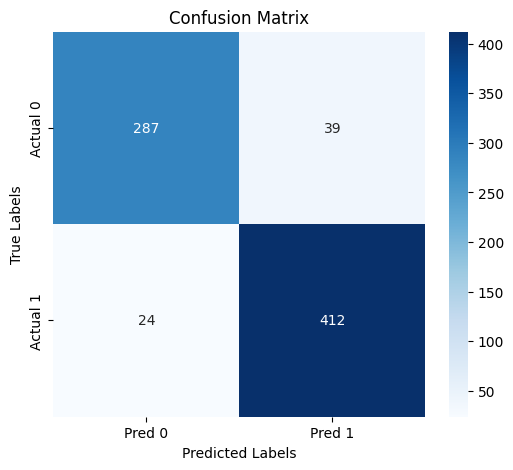

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score

# 1. Load Excel data
df = pd.read_excel('output.xlsx', sheet_name="Sheet1")
le = LabelEncoder()
df['Class'] = le.fit_transform(df['Class'])  # Cammeo -> 0 (or 1)
print(df.head())

# 2. Define feature matrix X and target vector y
X = df.drop("Class", axis=1)  # Replace 'label' with your actual target column
y = df["Class"]

# # 3. Identify categorical and numerical columns
# categorical_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()
# numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()

# # 4. Preprocessing steps
# # For numeric columns:
# numeric_transformer = Pipeline(steps=[
#     ("imputer_num", SimpleImputer(strategy="mean")), # Fill missing values with mean
#     ("scaler", StandardScaler()) # Scale features using StandardScaler
# ])

# # For categorical columns:
# categorical_transformer = Pipeline(steps=[
#     ("imputer_cat", SimpleImputer(strategy="most_frequent")), # Fill missing values with most frequent category
# ])

# preprocessor = ColumnTransformer(transformers=[
#     ("num", numeric_transformer, numerical_cols),
#     ("cat", categorical_transformer, categorical_cols)
# ])

# 5. Define a pipeline with preprocessing and logistic regression
# pipeline = Pipeline(steps=[
#     ("preprocessor", preprocessor),
#     ("classifier", LogisticRegression(solver="liblinear"))
# ])

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression(solver="liblinear"))
])

# 6. Define hyperparameter grid
# param_grid = {
#     "classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],         # Regularization strength
#     "classifier__penalty": ["l1", "l2"],              # L1 or L2 regularization
#     "classifier__class_weight": [None, "balanced"]    # Optional class balancing
# }

param_grid = [{
    "classifier__penalty": ["l1"],
    "classifier__C": [7.5, 7.7, 7.9, 8, 8.1, 8.3, 8.5],
    "classifier__class_weight": [None, "balanced"],
    "classifier__fit_intercept": [True, False],
    "classifier__max_iter": [50, 100, 500, 1000],
    "classifier__tol": [1e-5, 1e-4, 1e-3, 1e-2],
    "classifier__dual": [False],
}, {
    "classifier__penalty": ["l2"],
    "classifier__C": [7.5, 7.7, 7.9, 8, 8.1, 8.3, 8.5],
    "classifier__class_weight": [None, "balanced"],
    "classifier__fit_intercept": [True, False],
    "classifier__max_iter": [50, 100, 500, 1000],
    "classifier__tol": [1e-5, 1e-4, 1e-3, 1e-2],
    "classifier__dual": [False, True],
}, ]

# 7. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# 8. Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="accuracy",        # Change to 'accuracy' if preferred
    # cv=10,
    cv=skf,
    n_jobs=-1,
    verbose=2
)

# 9. Fit the model
grid_search.fit(X_train, y_train)

# 10. Print best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# 11. Final evaluation on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

calculate_stuffs(best_model, y_test, y_pred)

### **LogisticRegression With Random Forest**

TP: 409, TN: 290, FP: 36, FN: 27

Accuracy     = 0.9173
Sensitivity  = 0.9381
Specificity  = 0.8896
Precision    = 0.9191
F1 Score     = 0.9285
NPV          = 0.9148
FPR          = 0.1104
FDR          = 0.0809
FNR          = 0.0619


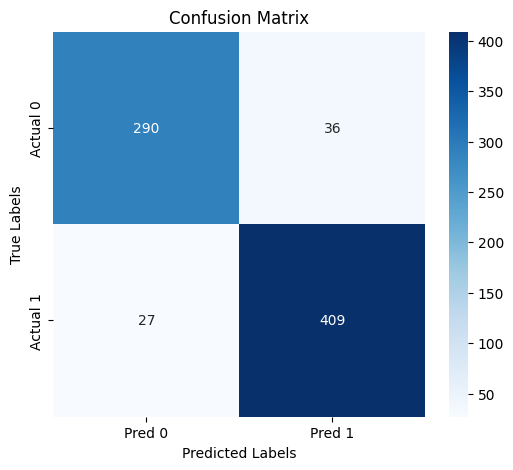

In [5]:
# Import các thư viện cần thiết
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load dữ liệu từ file CSV (đảm bảo file đã được tải lên hoặc có đường dẫn đúng)
data = pd.read_excel('output.xlsx', sheet_name="Sheet1")
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])  # Cammeo -> 0 (or 1)

# Giả sử cột 'target' là nhãn, còn các cột khác là đặc trưng.
# Nếu tên cột khác, bạn cần điều chỉnh lại.
X = data.drop("Class", axis=1)  # Các đặc trưng
y = data["Class"]               # Nhãn

# Nếu dữ liệu có giá trị thiếu, bạn có thể thực hiện tiền xử lý như sau (tùy chọn)
# X = X.fillna(method='ffill')

# Tách dữ liệu thành 2 phần: tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Chuẩn hóa dữ liệu (thường cần thiết cho Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
lr = LogisticRegression()

# Stacking model
stacked_model = StackingClassifier(
    estimators=[('rf', rf)],
    final_estimator=lr,
    passthrough=True,  # include original features in meta-learner
    cv=skf
)
stacked_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred = stacked_model.predict(X_test_scaled)

# Đánh giá mô hình
calculate_stuffs(stacked_model, y_test, y_pred)
